# First model

In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Scikit Learn Iris Demo dataset.
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
len(df)

150

In [7]:
# Verify if the dataset is missing values.
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Prepapre training / testing subsets

In [15]:
from sklearn.utils import shuffle

# Shuffle data set rows 
shuffled = shuffle(df)

# Separate features (X) from the prediction target.
X = shuffled.drop('target', axis=1)
y = shuffled['target']

In [16]:
from sklearn.model_selection import train_test_split

# Split the data set for training & validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
len(X_train), len(X_test), len(y_train), len(y_test)

(120, 30, 120, 30)

## Create scaling -> training -> scoring pipeline

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Create a pipeline to normalize the data & fit the model.
pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

# Train the model
pipe.fit(X_train, y_train)

# Score the model with the test data
pipe.score(X_test, y_test)

0.9333333333333333

In [79]:
y_preds = pipe.predict(X_test)

y_preds

array([1, 0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2,
       0, 1, 2, 2, 2, 0, 1, 2])

Text(-1.5, 0.5, 'Prediction')

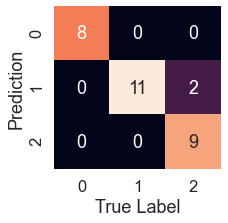

In [88]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

sns.set(font_scale=1.5) # Increase font size

fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True, # Annotate the boxes
                 cbar=False)
plt.xlabel("True Label")
plt.ylabel("Prediction")

In [83]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.85      0.92        13
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.95      0.94        30
weighted avg       0.95      0.93      0.93        30

